In [1]:
from keras.datasets import fashion_mnist
import tensorflow as tf

Using TensorFlow backend.


In [2]:
%pylab inline
import os
import keras
import numpy as np
import pandas as pd
import keras.backend as K

from time import time
from sklearn.cluster import KMeans
from keras import callbacks
from keras.models import Model
from keras.optimizers import SGD
from keras.layers import Dense, Input
from keras.initializers import VarianceScaling
from keras.engine.topology import Layer, InputSpec

from scipy.misc import imread
from sklearn.metrics import accuracy_score, normalized_mutual_info_score

Populating the interactive namespace from numpy and matplotlib


In [3]:
(train_x, train_y), (val_x, val_y) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 29s 7us/step


In [0]:
train_x = train_x/255.
val_x = val_x/255.

train_x = train_x.reshape(-1, 784)
val_x = val_x.reshape(-1, 784)

In [0]:
with tf.device('/gpu:0'):
    # this is our input placeholder
    input_img = Input(shape=(784,))

    # "encoded" is the encoded representation of the input
    encoded = Dense(2000, activation='relu')(input_img)
    encoded = Dense(500, activation='relu')(encoded)
    encoded = Dense(500, activation='relu')(encoded)
    encoded = Dense(10, activation='sigmoid')(encoded)

    # "decoded" is the lossy reconstruction of the input
    decoded = Dense(500, activation='relu')(encoded)
    decoded = Dense(500, activation='relu')(decoded)
    decoded = Dense(2000, activation='relu')(decoded)
    decoded = Dense(784)(decoded)

    # this model maps an input to its reconstruction
    autoencoder = Model(input_img, decoded)

In [6]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2000)              1570000   
_________________________________________________________________
dense_2 (Dense)              (None, 500)               1000500   
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5010      
_________________________________________________________________
dense_5 (Dense)              (None, 500)               5500      
_________________________________________________________________
dense_6 (Dense)              (None, 500)               250500    
__________

In [0]:
#  this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [0]:
autoencoder.compile(optimizer='adam', loss='mse')

In [0]:
estop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')

In [10]:
with tf.device('/gpu:0'):
   train_history = autoencoder.fit(train_x, train_x, epochs=500, batch_size=2048, validation_data=(val_x, val_x), callbacks=[estop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/500
60000/60000 [==============================] - 4s 61us/step - loss: 0.0921 - val_loss: 0.0685
Epoch 2/500
60000/60000 [==============================] - 2s 33us/step - loss: 0.0588 - val_loss: 0.0480
Epoch 3/500
60000/60000 [==============================] - 2s 33us/step - loss: 0.0429 - val_loss: 0.0392
Epoch 4/500
60000/60000 [==============================] - 2s 33us/step - loss: 0.0370 - val_loss: 0.0347
Epoch 5/500
60000/60000 [==============================] - 2s 33us/step - loss: 0.0329 - val_loss: 0.0304
Epoch 6/500
60000/60000 [==============================] - 2s 33us/step - loss: 0.0295 - val_loss: 0.0274
Epoch 7/500
60000/60000 [==============================] - 2s 33us/step - loss: 0.0263 - val_loss: 0.0253
Epoch 8/500
60000/60000 [==============================] - 2s 33us/step - loss: 0.0251 - val_loss: 0.0244
Epoch 9/500
60000/60000 [==============================] - 2s 33us/step - loss: 0.0238 - val_loss: 0.0

In [0]:
pred = autoencoder.predict(val_x)

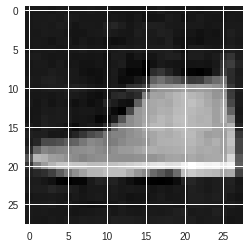

In [12]:
plt.imshow(pred[0].reshape(28, 28), cmap='gray')

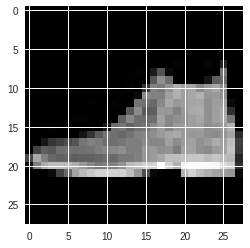

In [13]:
plt.imshow(val_x[0].reshape(28, 28), cmap='gray')